<function matplotlib.pyplot.show(close=None, block=None)>

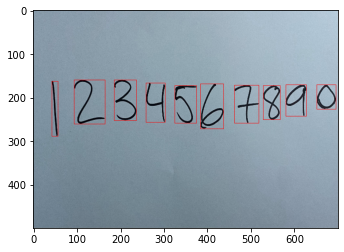

In [1]:
# Image with all digits
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

image = cv2.imread('number_test4.jpg')
image = cv2.resize(image, (700, 500))
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(grey.copy(), 100, 255, cv2.THRESH_BINARY_INV)
_, contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

preprocessed_digits = []
x_coord = []
y_coord = []

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    
    # Cropping digit out of image
    digit = thresh[y:y+h, x:x+w]
    
    # Check size of digit to attempt to keep extraneous markings out of data
    if(digit.size > 325):
        # Create rectangle around each digit in image to display
        cv2.rectangle(image, (x, y), (x+w, y+h), color=(255, 0, 0))
    
        # Resizing digit to 18x18 to be centered in 28x28 in image
        resized_digit = cv2.resize(digit, (18,18))
    
        # Pad digit with 5 pixels of black on each side to have digit centered in 28x28 image
        padded_digit = np.pad(resized_digit, ((5,5),(5,5)), 'constant', constant_values=0)
    
        # Appending final preprocessed digit to list
        preprocessed_digits.append(padded_digit)
        x_coord.append(x)
        y_coord.append(y)
    
plt.imshow(image, cmap='gray')
plt.show

In [2]:
df = pd.DataFrame()
df['Preprocessed_Digits'] = preprocessed_digits
df['X_Coord'] = x_coord
df['Y_Coord'] = y_coord
df

,Preprocessed_Digits,X_Coord,Y_Coord
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",528,173
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",325,173
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",462,172
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",651,171
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",580,171
5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",384,169
6,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",259,167
7,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",43,163
8,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",186,160
9,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",94,160


In [3]:
df_1 = df.sort_values(by=['X_Coord', 'Y_Coord'], ascending=True)
df_1

,Preprocessed_Digits,X_Coord,Y_Coord
7,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",43,163
9,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",94,160
8,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",186,160
6,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",259,167
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",325,173
5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",384,169
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",462,172
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",528,173
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",580,171
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",651,171


In [4]:
df_1 = df_1.reset_index(drop=True)
df_1

,Preprocessed_Digits,X_Coord,Y_Coord
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",43,163
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",94,160
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",186,160
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",259,167
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",325,173
5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",384,169
6,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",462,172
7,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",528,173
8,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",580,171
9,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",651,171


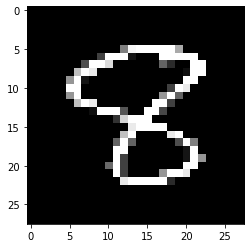

In [5]:
plt.imshow(df.Preprocessed_Digits[0], cmap='gray')
plt.show()

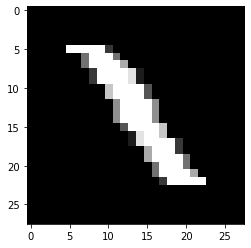

In [6]:
plt.imshow(df_1.Preprocessed_Digits[0], cmap='gray')
plt.show()

Y changed to: 252 Height: 124
Y changed to: 252 Height: 111
Y changed to: 252 Height: 106
Y changed to: 252 Height: 104
Y changed to: 252 Height: 108
Y changed to: 85 Height: 98
Y changed to: 85 Height: 95
Y changed to: 85 Height: 119
Y changed to: 85 Height: 134


<function matplotlib.pyplot.show(close=None, block=None)>

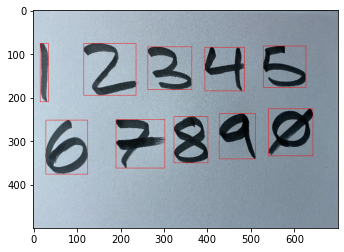

In [49]:
image = cv2.imread('number_test_rows.jpg')
image = cv2.resize(image, (700, 500))
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(grey.copy(), 100, 255, cv2.THRESH_BINARY_INV)
_, contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

_, y1, _, _ = cv2.boundingRect(contours[0])

preprocessed_digits = []
x_coord = []
y_coord = []
y_row = []

#print('y_row', y_row)

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    
    # Cropping digit out of image
    digit = thresh[y:y+h, x:x+w]
    
    # Check size of digit to attempt to keep extraneous markings out of data
    if(digit.size > 325):
        
        if(y_row == []):
            y_row.append(y)
        
        # Create rectangle around each digit in image to display
        cv2.rectangle(image, (x, y), (x+w, y+h), color=(255, 0, 0))
    
        # Resizing digit to 18x18 to be centered in 28x28 in image
        resized_digit = cv2.resize(digit, (18,18))
    
        # Pad digit with 5 pixels of black on each side to have digit centered in 28x28 image
        padded_digit = np.pad(resized_digit, ((5,5),(5,5)), 'constant', constant_values=0)
        
        y_flag = False
        for row_y in y_row:
            if((y < (row_y + h/1)) and (y > row_y - h/1)):
                y = row_y
                y_flag = True
                print('Y changed to:', y, 'Height:', h)
            if(y_flag == True):
                break
        if(y_flag == False):
            y_row.append(y)
        
    
        # Appending final preprocessed digit to list
        preprocessed_digits.append(padded_digit)
        x_coord.append(x)
        y_coord.append(y)
    
plt.imshow(image, cmap='gray')
plt.show

In [50]:
df = pd.DataFrame()
df['Preprocessed_Digits'] = preprocessed_digits
df['X_Coord'] = x_coord
df['Y_Coord'] = y_coord
df

,Preprocessed_Digits,X_Coord,Y_Coord
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",29,252
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",190,252
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",323,252
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",427,252
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",540,252
5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",394,85
6,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",263,85
7,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",528,85
8,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",116,85
9,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",16,85


In [51]:
df_1 = df.sort_values(by=['Y_Coord', 'X_Coord'], ascending=True)
df_1 = df_1.reset_index(drop=True)
df_1

,Preprocessed_Digits,X_Coord,Y_Coord
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",16,85
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",116,85
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",263,85
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",394,85
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",528,85
5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",29,252
6,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",190,252
7,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",323,252
8,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",427,252
9,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",540,252


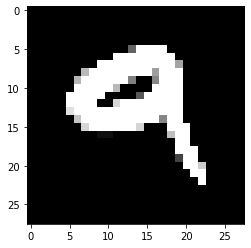

In [66]:
plt.imshow(df.Preprocessed_Digits[3], cmap='gray')
plt.show()

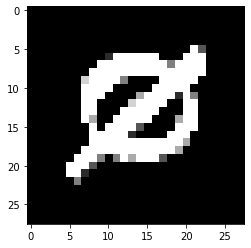

In [63]:
plt.imshow(df_1.Preprocessed_Digits[9], cmap='gray')
plt.show()